
# Analysis on COVID 19 data

## - Extraction of data 
    -  Beautiful soup
    -  Requests
    -  NLP 
    
## - Cleaning of data 
    - Pandas
    - Numpy
  
## - Visualization in Jupyter and Tableau ( seaborn, matplotlib)
 
- [Most impacted countries](#1) 

- [Active Cases - country wise](#2)

- [Resilient Coefficient - Recovery - Countrywise](#3)

- [Mortality country wise](#4)

- [Mortality rate country wise](#5)


## - Mining interesting insight    

__Soure__: https://www.worldometers.info/coronavirus/ and 

__susequent sources__ : https://www.worldometers.info/coronavirus/about/#sources

In [1]:
import requests
from bs4 import BeautifulSoup 

In [2]:
response = requests.get('https://www.worldometers.info/coronavirus/')

In [3]:
covid_data = response.content

In [4]:
soup = BeautifulSoup(covid_data)

In [ ]:
soup.prettify

In [6]:
for table in soup.find_all('table'):
    print(table.attrs['id'])

main_table_countries_today
main_table_countries_yesterday


In [7]:
# will pick data from main_table_countries_today
data = soup.find_all('table')[0]
column_name = []
# look for header first
for th in data.find_all('th'):
    column_name.append(th.text)
    print(th.text)

#
Country,Other
TotalCases
NewCases
TotalDeaths
NewDeaths
TotalRecovered
ActiveCases
Serious,Critical
Tot Cases/1M pop
Deaths/1M pop
TotalTests
Tests/
1M pop

Population
Continent


In [ ]:
# look for all rows 
for tr in data.find_all('tr'):
    print(tr.text)

In [9]:
# look for data from one row

tr = data.find_all('tr')

for td in tr[1].find_all('td'):
    print(td.text)



North America

1,798,979
+3,779
110,231
+436
482,930
1,205,818
19,045





North America


In [10]:
# now extracting data from all rows
table_data = []
for tr in data.find_all('tr'):
    row_data=[]
    for td in tr.find_all('td'):
        row_data.append(td.text)
    table_data.append(row_data)

In [11]:
# list inside which are empty
for i,lst in enumerate(table_data):
    if len(lst)==0:
        print(i, lst)

0 []


In [12]:
# removing the list at index 0
table_data.remove([])
# table_data.pop(index=0)

In [13]:
len(table_data)

231

In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [15]:
df_covid = pd.DataFrame(data=table_data,columns=column_name)

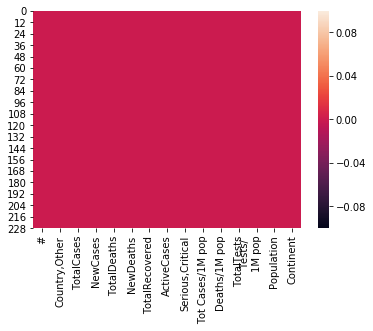

In [16]:
sns.heatmap(df_covid.isna()) # isna function shows that it does not have any null values. however it requires more checking.

In [17]:
df_covid.shape

(231, 15)

In [18]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 15 columns):
#                   231 non-null object
Country,Other       231 non-null object
TotalCases          231 non-null object
NewCases            231 non-null object
TotalDeaths         231 non-null object
NewDeaths           231 non-null object
TotalRecovered      231 non-null object
ActiveCases         231 non-null object
Serious,Critical    231 non-null object
Tot Cases/1M pop    231 non-null object
Deaths/1M pop       231 non-null object
TotalTests          231 non-null object
Tests/
1M pop
      231 non-null object
Population          231 non-null object
Continent           231 non-null object
dtypes: object(15)
memory usage: 27.2+ KB


In [19]:
df_covid.describe(include = 'all')

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent
count,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231
unique,216,224,201,36,123,16,193,175,74,182,84,185,186,215,8
top,,Total:,18,,,,6,0,,,,,,,Africa
freq,16,8,6,181,34,201,5,22,87,16,50,46,46,16,59


In [20]:
# lets pick one column and sort it in ascending order. and check for any null value.
df_covid['NewCases'].sort_values()

115          
122          
123          
194          
193          
        ...  
124       +71
9      +8,894
95        +85
224    +9,677
1      +9,677
Name: NewCases, Length: 231, dtype: object

In [21]:
df_covid['NewCases'][115] 
# there are lot of cell with '' value. but it is considered as str. So now need to change them into nan.

''

In [22]:
df_covid['NewCases'][115] = np.nan

In [23]:
df_covid['NewCases'][115] 

nan

In [24]:
df_covid.isna().sum()

#                   0
Country,Other       0
TotalCases          0
NewCases            1
TotalDeaths         0
NewDeaths           0
TotalRecovered      0
ActiveCases         0
Serious,Critical    0
Tot Cases/1M pop    0
Deaths/1M pop       0
TotalTests          0
Tests/\n1M pop\n    0
Population          0
Continent           0
dtype: int64

In [25]:
# removing all '' cells with np.nan
counter=0
for i in df_covid:
    for index,j in enumerate(df_covid[i]):
        if isinstance(j,str) and len(j)==0:
            df_covid[i][index]=np.nan
            counter+=1
print( 'Tolal null value updated :', counter)            

Tolal null value updated : 664


In [26]:
df_covid.isna().sum()

#                    16
Country,Other         0
TotalCases            0
NewCases            181
TotalDeaths           0
NewDeaths           201
TotalRecovered        2
ActiveCases           0
Serious,Critical     87
Tot Cases/1M pop     16
Deaths/1M pop        50
TotalTests           46
Tests/\n1M pop\n     46
Population           16
Continent             4
dtype: int64

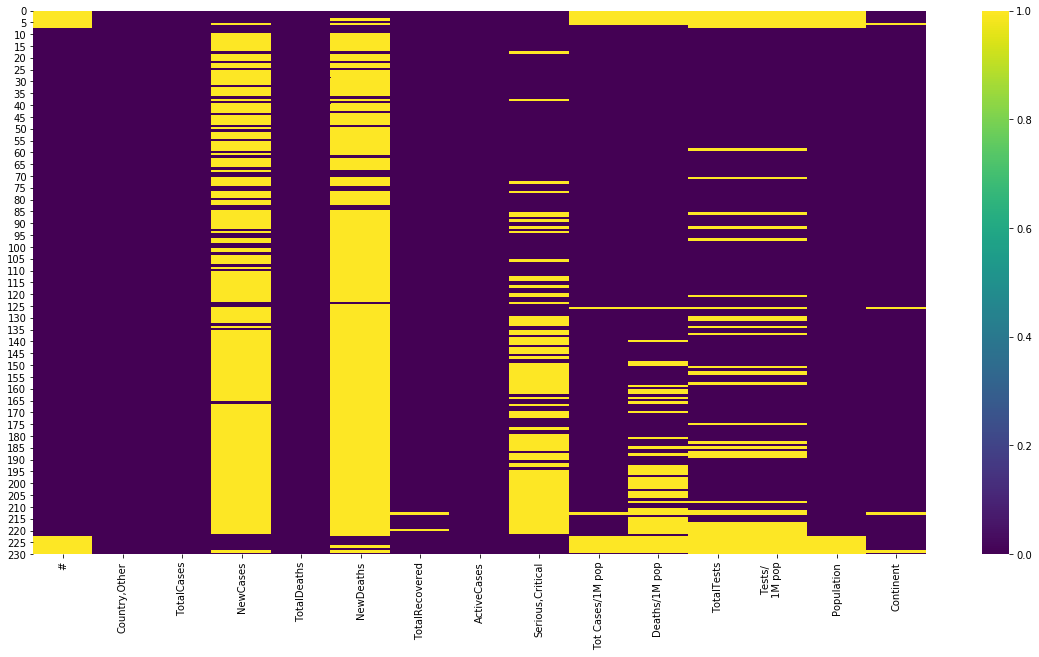

In [27]:

plt.figure(figsize=(20,10))
sns.heatmap(df_covid.isna(),cmap='viridis') 

## There are several cells with null values. Yellow shows null.

## List of Highly impacted country - Total cases till now

<a name="1"></a>

In [28]:
## change the data type to int, and remove ',' from each number first.
df_covid['TotalCases'] = df_covid['TotalCases'].map(lambda x:int(x.replace(',','')))

In [29]:
## remove unwanted data & check only top 20 countries
df_covid=df_covid[ df_covid['#'].isna() == False]


In [30]:
df_covid_a = df_covid.sort_values(by='TotalCases',ascending = False).head(20)

Text(0.5, 0, 'Impacted Countries')

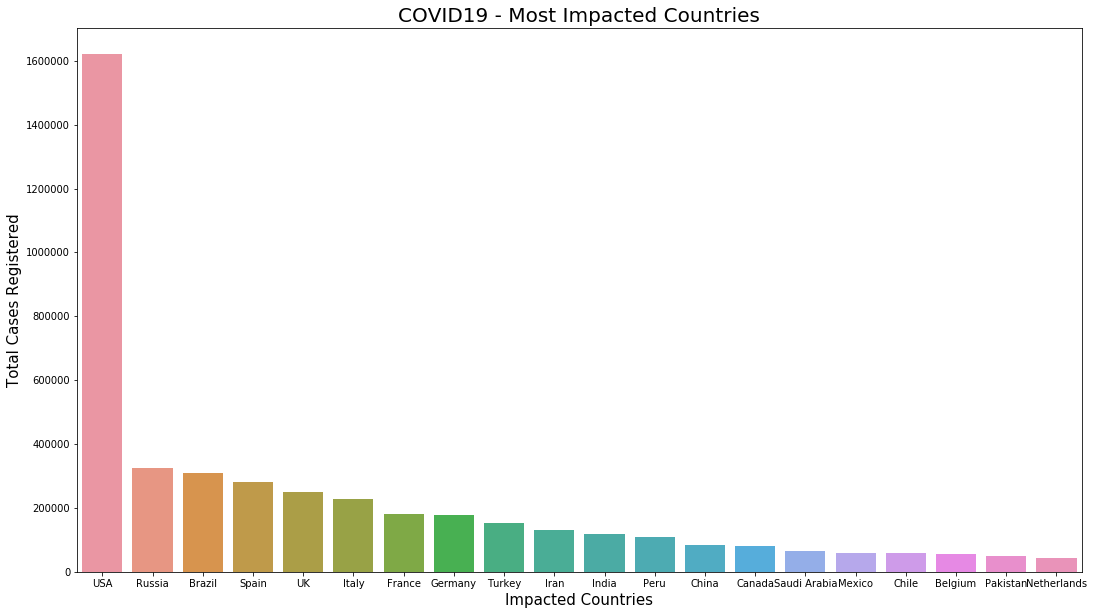

In [31]:
plt.figure(figsize=(18,10))
sns.barplot(df_covid_a['Country,Other'],df_covid_a['TotalCases'], data=df_covid_a)
plt.title('COVID19 - Most Impacted Countries',{'fontsize':20})
plt.ylabel('Total Cases Registered',{'fontsize':15})
plt.xlabel('Impacted Countries',{'fontsize':15})


## Most active cases 

<a name="2"></a>

In [32]:
## change the data type to int, and remove ',' from each number first. except float and 'N/A'


df_covid['ActiveCases'] = df_covid['ActiveCases'].map(lambda x:int(x.replace(',','')) \
                                                            if np.logical_and(isinstance(x,str),x!='N/A') else x)

In [33]:
df_covid_b = df_covid.drop(labels=(df_covid[df_covid['ActiveCases']=='N/A']).index,axis=0)
df_covid_b = df_covid_b.sort_values(by='ActiveCases',ascending = False).head(20)

Text(0.5, 0, 'Impacted Countries')

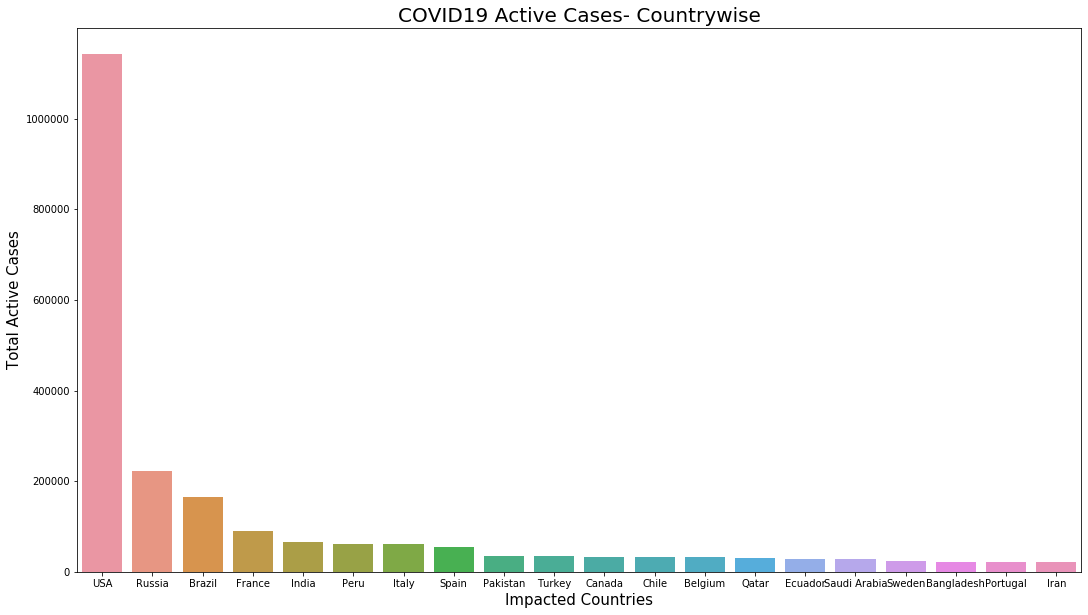

In [34]:
plt.figure(figsize=(18,10))
plt.title('COVID19 Active Cases- Countrywise',{'fontsize':20})

sns.barplot(df_covid_b['Country,Other'],df_covid_b['ActiveCases'], data=df_covid_b)
plt.ylabel('Total Active Cases',{'fontsize':15})
plt.xlabel('Impacted Countries',{'fontsize':15})

## Resilient Quality shown  ( Recovery )

### Recovery rate would be calculated as ( total cases recovered / total cases registered ) * 100

<a name="3"></a>

In [181]:

df_covid['TotalRecovered'] = df_covid['TotalRecovered'].map(lambda x:int(x.replace(',','')) \
                                                            if np.logical_and(isinstance(x,str),x!='N/A') else x)

In [182]:
# df_covid['RecoveryRate'] = df_covid['TotalRecovered']/df_covid['TotalCases']*100

# there are some values which are stopping to make plot. need to remove them.

for index,i in enumerate(df_covid['TotalRecovered']):
    if isinstance(i,str):
        print(i, 'str' ,'------', df_covid.iloc[index]['Country,Other'])
    elif isinstance(i,float):
        print(i, 'float','------',df_covid.iloc[index]['Country,Other'])
    


N/A str ------ UK
N/A str ------ Netherlands
nan float ------ MS Zaandam
nan float ------ Lesotho


In [183]:

# UK and Netherland 'TotalRecovered' count is not available. will remove them from plot data.

df_covid_c = df_covid.drop(labels=(df_covid[df_covid['TotalRecovered']=='N/A']).index,axis=0)

In [184]:
print(df_covid_c.shape,'---', df_covid.shape) # two rows deleted from df_covid_c

(213, 15) --- (215, 15)


In [185]:
df_covid_c['RecoveryRate'] = df_covid_c['TotalRecovered']/df_covid_c['TotalCases']*100

In [186]:
df_covid_c['RecoveryRate']

8      23.5779
9      30.5791
10     40.5119
11     70.3128
13      59.016
        ...   
218        100
219        100
220        NaN
221        100
222    94.3161
Name: RecoveryRate, Length: 213, dtype: object

In [187]:
df_covid_c1 = df_covid_c.sort_values(by=['TotalCases'],ascending = False).head(20)
df_covid_c1 = df_covid_c1.sort_values(by='RecoveryRate',ascending= False)

Text(0.5, 0, 'Impacted Countries')

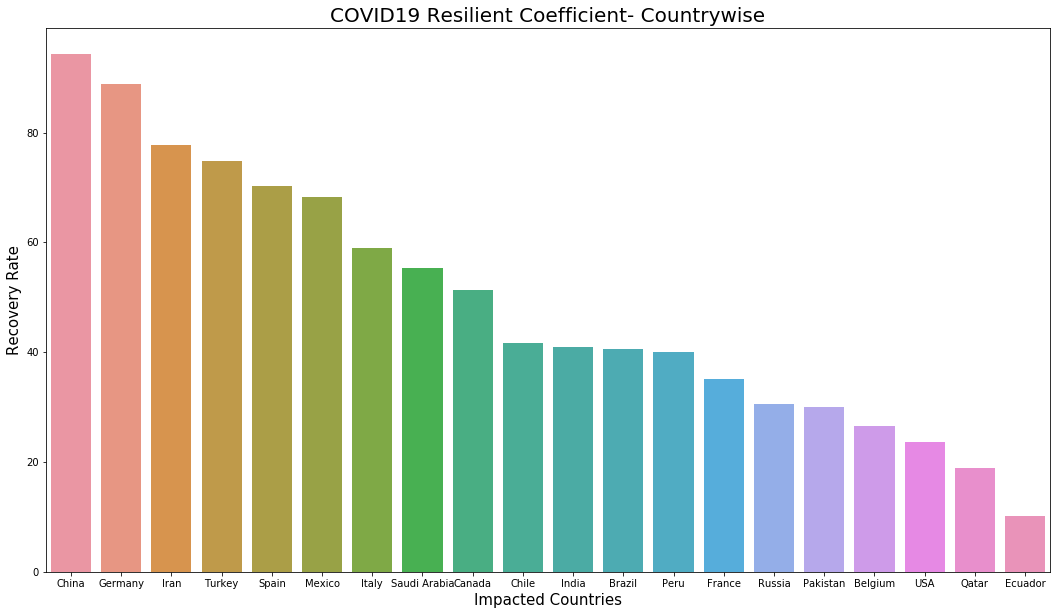

In [188]:
plt.figure(figsize=(18,10))
plt.title('COVID19 Resilient Coefficient- Countrywise',{'fontsize':20})

sns.barplot(df_covid_c1['Country,Other'],df_covid_c1['RecoveryRate'], data=df_covid_c1)
plt.ylabel('Recovery Rate',{'fontsize':15})
plt.xlabel('Impacted Countries',{'fontsize':15})

## Below countries are recovering fast as per the data - 
- China
- Germany
- Iran
- Turkey
- Spain
- Mexico

Above countries have managed to recover more than 60%. 

Next will export the data in Tableau: and further data mining would be carried out. Updated version will be updated here. 

# Mortality - country wise

<a name="4"></a>

In [113]:
# finding all rows with blank 'TolalDeaths'. 
df_covid_d = df_covid.drop(df_covid[df_covid['TotalDeaths']==' '].index,axis=0)

In [135]:
df_covid_d['TotalDeaths'] = df_covid_d['TotalDeaths'].map(lambda x:int(x.replace(',','')) if np.logical_and(isinstance(x,str),x!='N/A') else x)

In [136]:
df_covid.shape , df_covid_d.shape

((215, 15), (181, 15))

In [137]:
set([type(i) for i in df_covid_d.TotalDeaths])

{int}

In [189]:
df_covid_d1 = df_covid_d.sort_values(by=['TotalDeaths'],ascending = False).head(20)

Text(0.5, 0, 'Impacted Countries')

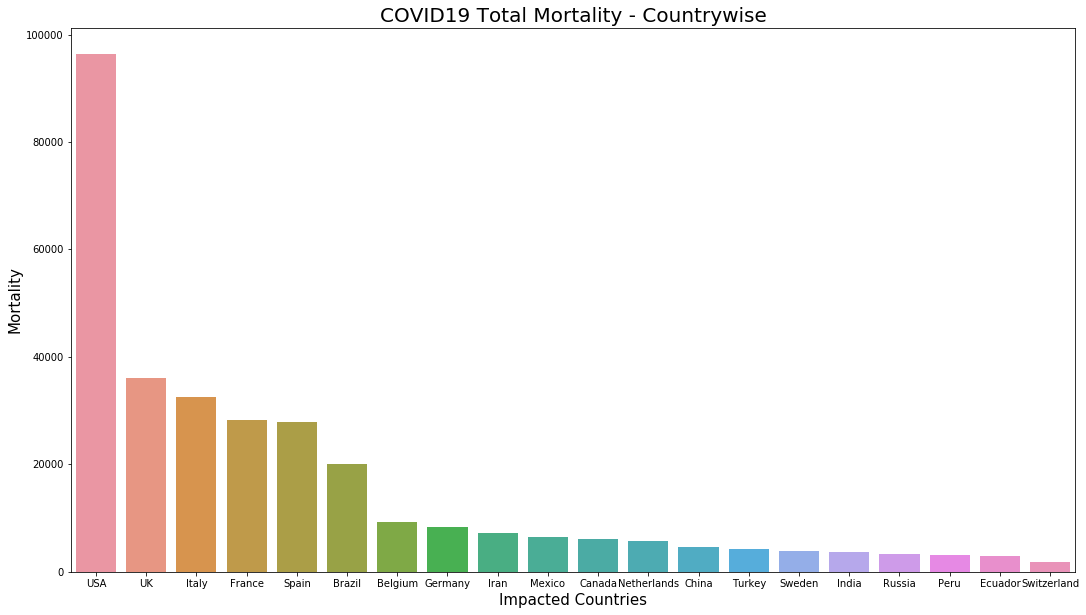

In [140]:
plt.figure(figsize=(18,10))
plt.title('COVID19 Total Mortality - Countrywise',{'fontsize':20})


sns.barplot(df_covid_d1['Country,Other'],df_covid_d1['TotalDeaths'], data=df_covid_d1)
plt.ylabel('Mortality',{'fontsize':15})
plt.xlabel('Impacted Countries',{'fontsize':15})

# Mortality Rate

- (TotalDeaths / TotalCases * 100)

- It will bring the comparative results - and would be easy to decide to which country has managed it well.

- Atleast 20000 Total cases

<a name="5"></a>

In [165]:
df_covid_d['MortalityRate'] = (df_covid_d['TotalDeaths'] / df_covid_d['TotalCases']) * 100

In [178]:
df_covid_d2 = df_covid_d[df_covid_d['TotalCases']>50000]

In [179]:
df_covid_d2 = df_covid_d2.sort_values(by=['MortalityRate'],ascending = False).head(20)

Text(0.5, 0, 'Impacted Countries')

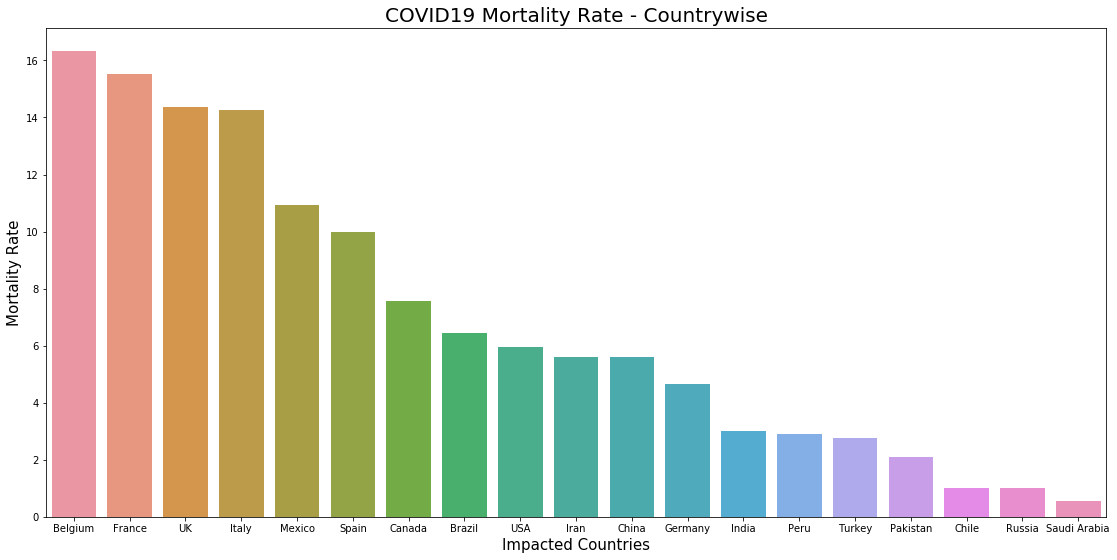

In [180]:
plt.figure(figsize=(19,9))
plt.title('COVID19 Mortality Rate - Countrywise',{'fontsize':20})


sns.barplot(df_covid_d2['Country,Other'],df_covid_d2['MortalityRate'], data=df_covid_d2)
plt.ylabel('Mortality Rate',{'fontsize':15})
plt.xlabel('Impacted Countries',{'fontsize':15})

### It is evident that Belgium, France, UK, Italy, Mexico are the top 5  countries which faced worst mortality in their region. 
